# Practica 3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import seaborn as sns
from scipy.integrate import quad

In [2]:
plt.rcParams.update(
    {
        "grid.color": "gray",
        "grid.linestyle": "--",
        "grid.alpha": 0.7,
        "axes.facecolor": "whitesmoke",
        "axes.labelsize": 12,
        "axes.labelweight": "bold",
        "axes.labelcolor": "navy",
        "axes.titlesize": 14,
        "axes.titleweight": "bold",
        "axes.titlecolor": "navy",
        "xtick.color": "black",
        "ytick.color": "black",
        "legend.fontsize": 10,
        "legend.frameon": False,
        "figure.autolayout": True,
    }
)

## 1. La estructura de la funcion de costo epistemica


$$ P(\text{Hipotesis, Datos }= \{d_1,d_2, ...\}) = P(\text{Hipotesis}) P(d_1|\text{Hipotesis}) P(d_2|d_1\text{Hipotesis}) ... $$


- Variables del problema de apuestas.

Recompensas:
$$ Q_c = 3, Q_s= 1,2$$

Proporcion de las apuestas:
$$ B_c = b \text{ y } B_s = 1-b$$

Recursos iniciales: $w_0$

Recursos en la ronda i: $w_i$


### 1.1 Calcular la esperanza de los recursos en los primeros dos pasos temporales con b=0.5


In [5]:
from itertools import product


# cara = 1, sello = 0
def Wb_datos(b, datos, w0=1, Qc=3, Qs=1.2):

    for d in datos:
        if d:
            w0 = w0 * b * Qc
        else:
            w0 = w0 * (1 - b) * Qs

    return w0


def esperanza_Wb_datos(b, steps, w0=1, Qc=3, Qs=1.2):

    # todos las combinaciones son equiprobables
    combinaciones = 2**steps
    probabilidad = 1 / combinaciones

    output = 0
    for data in product([0, 1], repeat=steps):
        output += probabilidad * Wb_datos(b, data, w0, Qc, Qs)

    return output

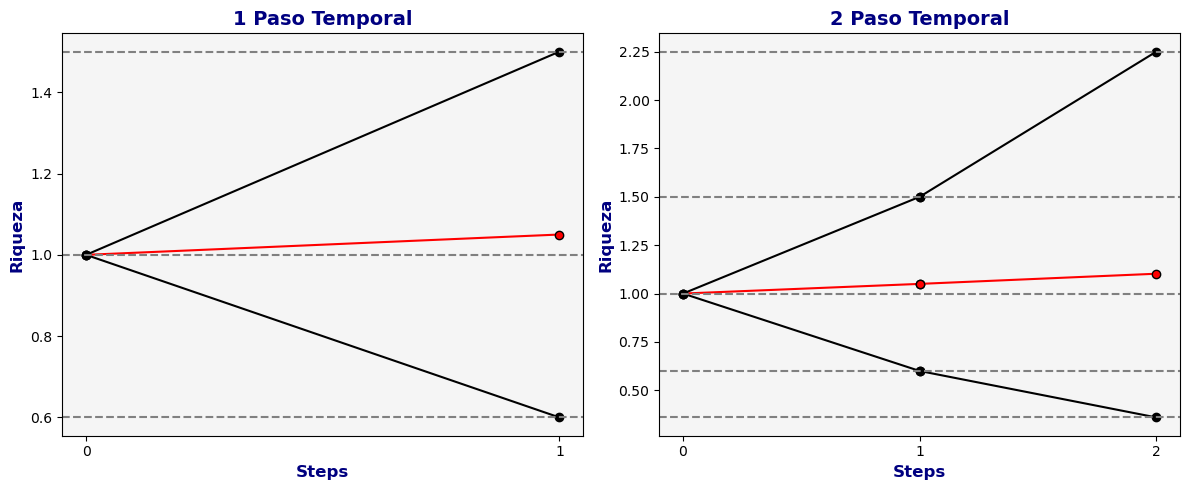

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

m0 = 1

axs[0].plot(
    [0, 1],
    [m0, esperanza_Wb_datos(0.5, 1)],
    color="red",
    marker="o",
    markeredgecolor="black",
)
axs[0].plot(
    [0, 1], [m0, Wb_datos(0.5, [1])], color="black", marker="o", markeredgecolor="black"
)
axs[0].plot(
    [0, 1], [m0, Wb_datos(0.5, [0])], color="black", marker="o", markeredgecolor="black"
)

axs[0].axhline(Wb_datos(0.5, [1]), color="gray", linestyle="--")
axs[0].axhline(1.0, color="gray", linestyle="--")
axs[0].axhline(Wb_datos(0.5, [0]), color="gray", linestyle="--")
axs[0].set_xticks([0, 1])

axs[0].set_title("1 Paso Temporal")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Riqueza")

# Segundo plot

axs[1].plot(
    [0, 1],
    [m0, esperanza_Wb_datos(0.5, 1)],
    color="red",
    marker="o",
    markeredgecolor="black",
)
axs[1].plot(
    [0, 1], [m0, Wb_datos(0.5, [1])], color="black", marker="o", markeredgecolor="black"
)
axs[1].plot(
    [0, 1], [m0, Wb_datos(0.5, [0])], color="black", marker="o", markeredgecolor="black"
)

axs[1].plot(
    [1, 2],
    [esperanza_Wb_datos(0.5, 1), esperanza_Wb_datos(0.5, 2)],
    color="red",
    marker="o",
    markeredgecolor="black",
)
axs[1].plot(
    [1, 2],
    [Wb_datos(0.5, [1]), Wb_datos(0.5, [1, 1])],
    color="black",
    marker="o",
    markeredgecolor="black",
)
axs[1].plot(
    [1, 2],
    [Wb_datos(0.5, [0]), Wb_datos(0.5, [0, 0])],
    color="black",
    marker="o",
    markeredgecolor="black",
)

axs[1].axhline(1.0, color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [1]), color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [0]), color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [1,1]), color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [0,0]), color="gray", linestyle="--")

axs[1].set_xticks([0, 1, 2])

axs[1].set_title("2 Paso Temporal")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Riqueza")

plt.tight_layout()

### 1.2. Simular 10000 personas, y graficar el promedio de sus recursos en los primeros 10 pasos temporales.

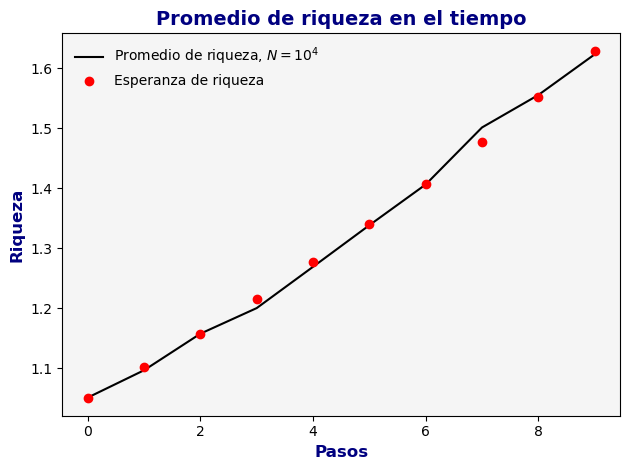

In [72]:
np.random.seed(211)

random_sample = [st.bernoulli.rvs(0.5, size=10) for _ in range(10000)]
average_over_sample_i = [
    np.mean([Wb_datos(0.5, sample[: i + 1]) for sample in random_sample])
    for i in range(10)
]

plt.plot(np.arange(0, 10), average_over_sample_i, color="black", label="Promedio de riqueza, $N=10^4$")
plt.plot(np.arange(0, 10), [esperanza_Wb_datos(0.5, i + 1) for i in range(10)], color="red", label="Esperanza de riqueza", linestyle="", marker="o")

plt.legend()
plt.xlabel("Pasos")
plt.ylabel("Riqueza")
plt.title("Promedio de riqueza en el tiempo")
plt.tight_layout()
